In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
all_samples = pd.read_pickle('/ghds/groups/labdesk/bshih/c19dash/c19_dashboard/c19_read_counts.pickle').dropna(subset=['pos_tube_rack'])

all_samples['RBP'] = all_samples.pos_tube_rack.str[:13]
all_samples['primer_plate'] = all_samples.pos_extraction.str[:13]
all_samples['row'] = all_samples.pos_extraction.str[14]
all_samples['column'] = all_samples.pos_extraction.str[15:].astype('int')

all_samples = all_samples[all_samples['pos_tube_rack'].str.contains(r'^RBP201112A001.*|^RBP201112A228.*|^RBP201112A229.*|^RBP201112A230.*')==True].sort_values(by='RBP')

## 201216_EXP19_SpittoonStudy1
RBP = ['RBP201112A001', 'RBP201112A228', 'RBP201112A229', 'RBP201112A230']

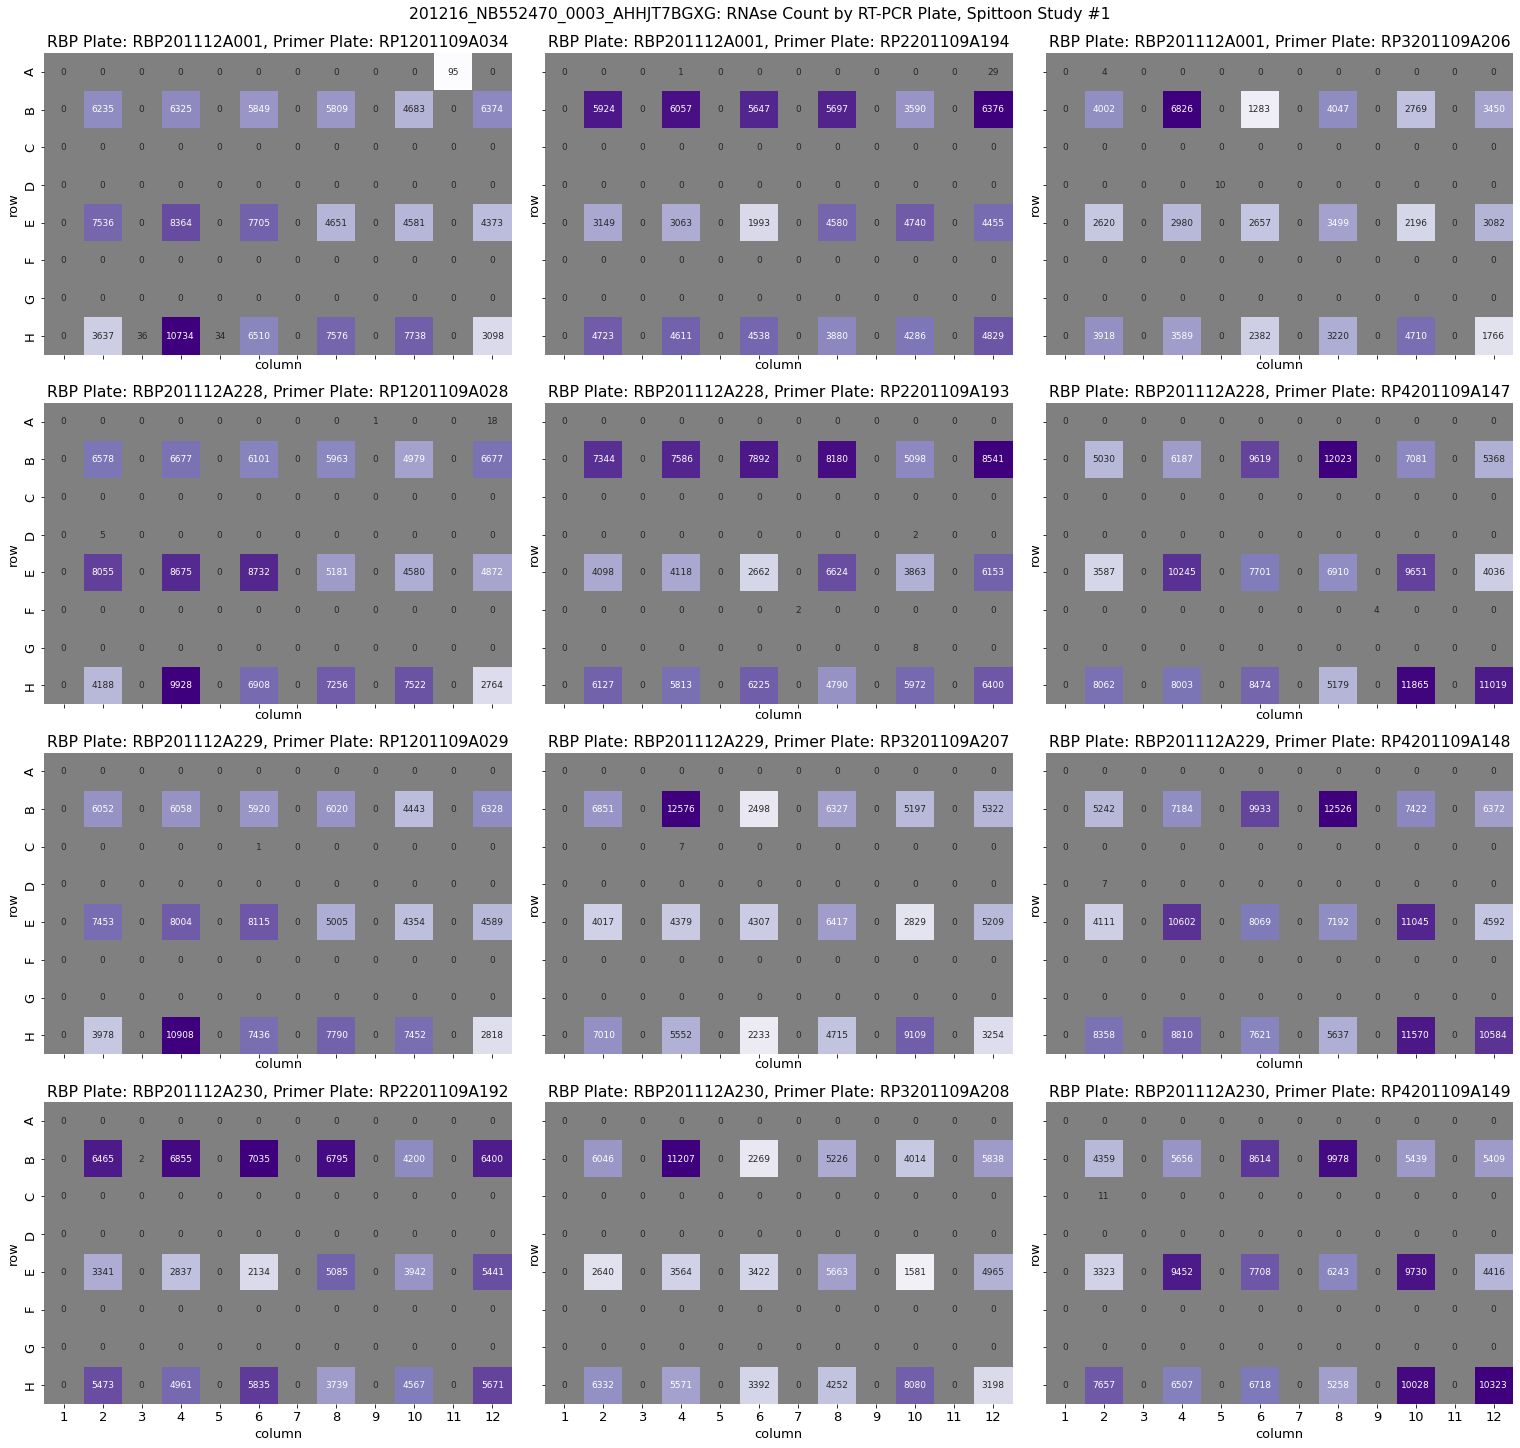

In [6]:
total_cols = 3
total_rows = 4
plt.rcParams['font.size'] = '13'
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, sharex=True, sharey=True, 
                        figsize=(7*total_cols, 5*total_rows), constrained_layout=True, squeeze=False)

fig.suptitle(f'{all_samples.iloc[0,0]}: RNAse Count by RT-PCR Plate, Spittoon Study #1')
fig.set_facecolor('white')

for i,k in zip(all_samples.RBP.unique(), range(4)):
    sub_RBP = all_samples[all_samples['RBP'] == i].sort_values(by='primer_plate')
    
    for l,m in zip(sub_RBP.primer_plate.unique(), range(3)):
        sub_primer = sub_RBP[sub_RBP['primer_plate'] == l]
        sub_primer.rnase_count.astype('int64')
        
        plate_map = sub_primer.loc[:, ['row', 'column', 'rnase_count']].pivot(index='row', columns='column', values='rnase_count').fillna(0)
            
        plate_map = plate_map.astype(dtype='int')
        
        row = k % total_rows
        pos = m % total_cols
        
        fig = sns.heatmap(plate_map, annot=True, cbar=False, cmap="Purples", 
                    vmin=500, fmt='d', annot_kws={"fontsize":9}, ax=axs[row][pos])
        
        fig = sns.heatmap(plate_map, mask=plate_map > 50, cmap=ListedColormap(['grey']), annot=False, ax=axs[row][pos], cbar=False)

        axs[row][pos].set_title(f'RBP Plate: {i}, Primer Plate: {l}')
            
plt.savefig('spittoonstudy#1', dpi=300)


### G19 Score 

In [4]:
all_samples[all_samples['pos_tube_rack'] == 'RBP201112A230:H2'].loc[:, ['covid_ratio', 'rnase_count', 'spikein_count', 'replicate_call', 'pos_tube_rack']]

,covid_ratio,rnase_count,spikein_count,replicate_call,pos_tube_rack
5047,0.00000,5473.0,55260.0,not_detected,RBP201112A230:H2
5448,0.00000,7657.0,20604.0,not_detected,RBP201112A230:H2
5251,0.01686,6332.0,45248.0,detected,RBP201112A230:H2
